

---



---


#ASSIGNMENT 4(NLP)


> Aaditya Bhatnagar


> COE11


> Roll No.: 102003267


---



---









#QUES 1

In [1]:
#import libraries
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub

import re
import string

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
#Load the dataset
train_data=pd.read_csv('/content/drive/MyDrive/datasets/sentiment_dataset/train.csv')
test_data=pd.read_csv('/content/drive/MyDrive/datasets/sentiment_dataset/test.csv')

In [93]:
#Remove null values from each row
train_data.dropna(axis=0,how='any',inplace=True)
test_data.dropna(axis=0,how='any',inplace=True)

In [94]:
#Remove rows with less than 3 words
train_data['num_words']=train_data['text'].apply(lambda x: len(str(x).split()))
mask=train_data['num_words']>2
train_data=train_data[mask]

test_data['num_words']=test_data['text'].apply(lambda x: len(str(x).split()))
mask=test_data['num_words']>2
test_data=test_data[mask]

In [95]:
#Pre-processing: Remove emoji's,flags, symbols, urls,digits, special characters, etc.
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', str(text))

def remove_url(text): 
    url_pattern  = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return url_pattern.sub(r'', text)
 # converting return value from list to string


def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = str(text).translate(table)
    #print('cleaned:'+text1)
    textArr= str(text1).split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()



In [96]:
#Applying pre-processing functions of training and test data
train_data['text']=train_data['text'].apply(remove_emoji)
train_data['text']=train_data['text'].apply(remove_url)
train_data['text']=train_data['text'].apply(clean_text)

test_data['text']=test_data['text'].apply(remove_emoji)
test_data['text']=test_data['text'].apply(remove_url)
test_data['text']=test_data['text'].apply(clean_text)


In [97]:
#Splitting training data into train and validation set
train_x,valid_x,train_y,valid_y=train_test_split(train_data['text'].tolist(),train_data['sentiment'].tolist(),random_state=0,test_size=0.33,stratify=train_data['sentiment'].tolist())

In [98]:
#Converting sentiments to numerical labels and then applying categorical encoding
le=LabelEncoder()
train_y=le.fit_transform(train_y)
train_y=keras.utils.to_categorical(train_y)
train_y[:1]
valid_y=le.transform(valid_y)
valid_y=keras.utils.to_categorical(valid_y)

test_y=le.transform(test_data['sentiment'].tolist())
test_y=keras.utils.to_categorical(test_y)

In [99]:
train_x=np.array(train_x)
valid_x=np.array(valid_x)
test_x=np.array(test_data['text'].tolist())

In [100]:
#Converting x and y arrays into tensor datasets
train_ds=tf.data.Dataset.from_tensor_slices((train_x,train_y))
valid_ds=tf.data.Dataset.from_tensor_slices((valid_x,valid_y))
test_ds=tf.data.Dataset.from_tensor_slices((test_x,test_y))

##Trying different embeddings



###Embedding 1

In [101]:
#Importing pre-trained word vectors from tensorflow hub
embedding='https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1'
hub_layer=hub.KerasLayer(embedding,trainable=True,input_shape=[],dtype=tf.string)

In [102]:
print(train_x[0])

just getting additional free


In [103]:
hub_layer(train_x[:1])

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[ 0.11455369, -0.1866774 ,  0.06512415,  0.08134115, -0.01151826,
        -0.11524305,  0.12023415, -0.07331401,  0.01356838,  0.10110557,
         0.23613119,  0.14543168,  0.08163899, -0.07233429, -0.20523241,
        -0.1214304 , -0.23791273,  0.10255092,  0.2020321 , -0.21148068,
        -0.0678859 ,  0.05351495, -0.01408586,  0.20452355, -0.00937091,
        -0.1497626 , -0.11929566,  0.18158671,  0.0896505 , -0.02291517,
         0.01531802, -0.05992603,  0.2879135 , -0.16843313, -0.0385192 ,
        -0.13624963, -0.08831967,  0.12513663,  0.2940288 , -0.04622522,
         0.19801788,  0.10322008, -0.02841865,  0.08371846, -0.17551522,
        -0.11099453,  0.02055123, -0.21532716,  0.32608953,  0.40941936]],
      dtype=float32)>

In [76]:
#Create a sequential Neural Network
model=keras.Sequential()
model.add(hub_layer)
model.add(keras.layers.Dense(10,activation='relu'))
model.add(keras.layers.Dense(3,activation='sigmoid'))

In [77]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 50)                48190600  
                                                                 
 dense_6 (Dense)             (None, 10)                510       
                                                                 
 dense_7 (Dense)             (None, 3)                 33        
                                                                 
Total params: 48,191,143
Trainable params: 48,191,143
Non-trainable params: 0
_________________________________________________________________


In [78]:
#Compile model-define loss function, accuracy, optimizer
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['CategoricalAccuracy'],
              optimizer='adam')

In [79]:
#Training neural network
history=model.fit(train_ds.batch(128),
          epochs=20,
          validation_data=valid_ds.batch(128))

Epoch 1/20


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


141/141 [==============================] - 17s 111ms/step - loss: 1.0440 - categorical_accuracy: 0.4553 - val_loss: 0.9504 - val_categorical_accuracy: 0.5729
Epoch 2/20
141/141 [==============================] - 3s 18ms/step - loss: 0.8147 - categorical_accuracy: 0.6628 - val_loss: 0.8084 - val_categorical_accuracy: 0.6395
Epoch 3/20
141/141 [==============================] - 3s 21ms/step - loss: 0.6367 - categorical_accuracy: 0.7486 - val_loss: 0.8006 - val_categorical_accuracy: 0.6474
Epoch 4/20
141/141 [==============================] - 3s 18ms/step - loss: 0.5169 - categorical_accuracy: 0.8085 - val_loss: 0.8392 - val_categorical_accuracy: 0.6373
Epoch 5/20
141/141 [==============================] - 3s 18ms/step - loss: 0.4232 - categorical_accuracy: 0.8516 - val_loss: 0.9050 - val_categorical_accuracy: 0.6297
Epoch 6/20
141/141 [==============================] - 3s 18ms/step - loss: 0.3507 - categorical_accuracy: 0.8815 - val_loss: 0.9879 - val_categorical_accuracy: 0.6223
Epoch 7

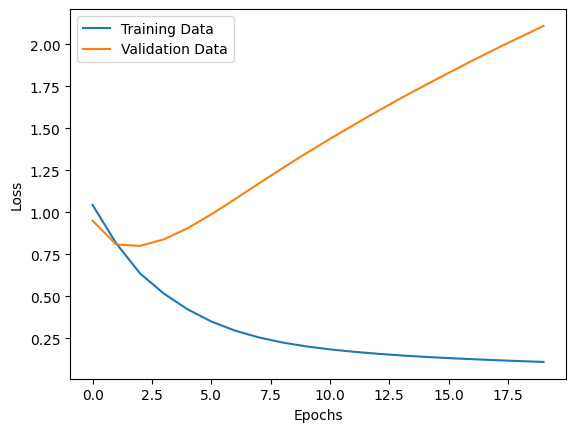

In [80]:
#ploting training and validation loss
plt.plot(history.history['loss'],label='Training Data')
plt.plot(history.history['val_loss'],label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

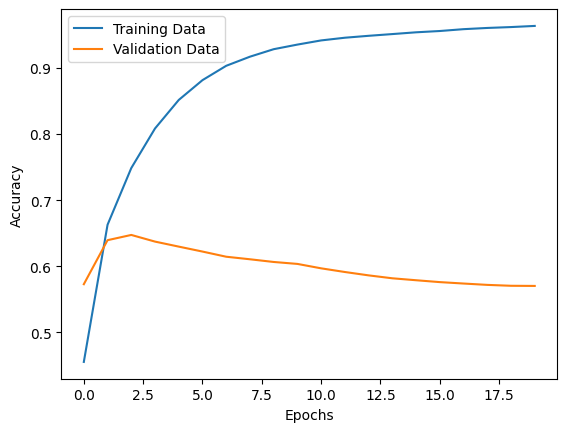

In [81]:
#ploting training and validation accuracy
plt.plot(history.history['categorical_accuracy'],label='Training Data')
plt.plot(history.history['val_categorical_accuracy'],label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

###Embedding 2

In [135]:
embedding2='https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim-with-oov/1'
hub_layer2=hub.KerasLayer(embedding2,trainable=True,input_shape=[],dtype=tf.string)

In [136]:
print(train_x[0])

just getting additional free


In [137]:
hub_layer2(train_x[:1])

<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[ 0.02252544, -1.102936  , -0.45312536,  1.1712923 , -0.9280152 ,
        -1.6799717 , -0.03097975, -0.04522766, -0.69689393, -0.3546787 ,
        -0.9819268 ,  1.3606595 , -0.7599448 ,  0.05979407, -0.7150928 ,
         0.48663718,  1.3430784 , -1.0147772 ,  0.13958323, -0.1454123 ]],
      dtype=float32)>

In [138]:
#Create a sequential Neural Network
model2=keras.Sequential()
model2.add(hub_layer2)
model2.add(keras.layers.Dense(10,activation='relu'))
model2.add(keras.layers.Dense(3,activation='sigmoid'))

In [139]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_5 (KerasLayer)  (None, 20)                389380    
                                                                 
 dense_20 (Dense)            (None, 10)                210       
                                                                 
 dense_21 (Dense)            (None, 3)                 33        
                                                                 
Total params: 389,623
Trainable params: 389,623
Non-trainable params: 0
_________________________________________________________________


In [140]:
#Compile model-define loss function, accuracy, optimizer
model2.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['CategoricalAccuracy'],
              optimizer='adam')

In [141]:
#Training neural network
history2=model2.fit(train_ds.batch(128),
          epochs=20,
          validation_data=valid_ds.batch(128))

Epoch 1/20


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


141/141 [==============================] - 13s 81ms/step - loss: 1.1089 - categorical_accuracy: 0.3935 - val_loss: 1.0285 - val_categorical_accuracy: 0.4819
Epoch 2/20
141/141 [==============================] - 1s 6ms/step - loss: 0.9794 - categorical_accuracy: 0.5219 - val_loss: 0.9513 - val_categorical_accuracy: 0.5480
Epoch 3/20
141/141 [==============================] - 1s 6ms/step - loss: 0.9057 - categorical_accuracy: 0.5770 - val_loss: 0.9037 - val_categorical_accuracy: 0.5797
Epoch 4/20
141/141 [==============================] - 1s 6ms/step - loss: 0.8444 - categorical_accuracy: 0.6168 - val_loss: 0.8661 - val_categorical_accuracy: 0.6046
Epoch 5/20
141/141 [==============================] - 1s 6ms/step - loss: 0.7919 - categorical_accuracy: 0.6503 - val_loss: 0.8391 - val_categorical_accuracy: 0.6211
Epoch 6/20
141/141 [==============================] - 1s 7ms/step - loss: 0.7493 - categorical_accuracy: 0.6767 - val_loss: 0.8222 - val_categorical_accuracy: 0.6294
Epoch 7/20
14

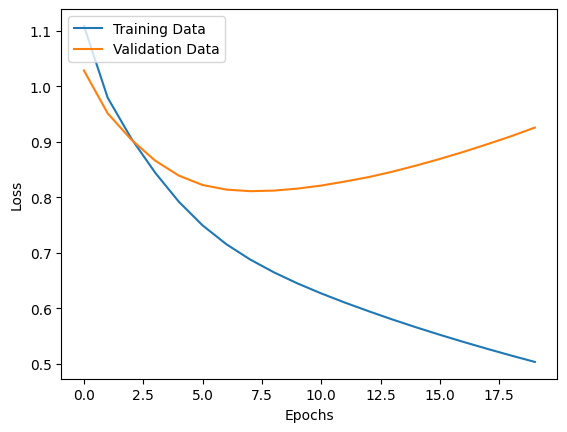

In [142]:
#ploting training and validation loss
plt.plot(history2.history['loss'],label='Training Data')
plt.plot(history2.history['val_loss'],label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

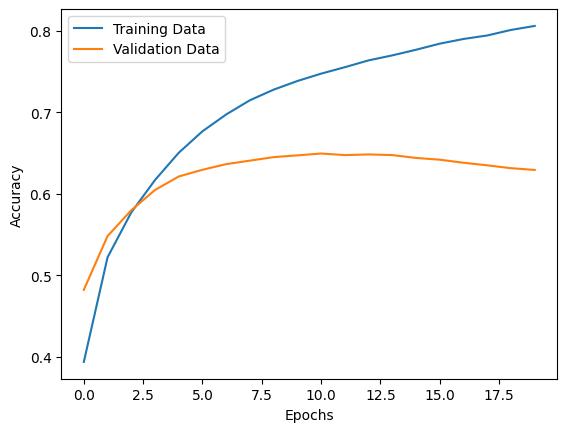

In [143]:
#ploting training and validation accuracy
plt.plot(history2.history['categorical_accuracy'],label='Training Data')
plt.plot(history2.history['val_categorical_accuracy'],label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

###Embedding 3

In [144]:
embedding3='https://tfhub.dev/google/tf2-preview/nnlm-en-dim50-with-normalization/1'
hub_layer3=hub.KerasLayer(embedding3,trainable=True,input_shape=[],dtype=tf.string)

In [145]:
print(train_x[0])

just getting additional free


In [146]:
hub_layer3(train_x[:1])

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[ 0.11455369, -0.1866774 ,  0.06512415,  0.08134115, -0.01151826,
        -0.11524305,  0.12023415, -0.07331401,  0.01356838,  0.10110557,
         0.23613119,  0.14543168,  0.08163899, -0.07233429, -0.20523241,
        -0.1214304 , -0.23791273,  0.10255092,  0.2020321 , -0.21148068,
        -0.0678859 ,  0.05351495, -0.01408586,  0.20452355, -0.00937091,
        -0.1497626 , -0.11929566,  0.18158671,  0.0896505 , -0.02291517,
         0.01531802, -0.05992603,  0.2879135 , -0.16843313, -0.0385192 ,
        -0.13624963, -0.08831967,  0.12513663,  0.2940288 , -0.04622522,
         0.19801788,  0.10322008, -0.02841865,  0.08371846, -0.17551522,
        -0.11099453,  0.02055123, -0.21532716,  0.32608953,  0.40941936]],
      dtype=float32)>

In [147]:
#Create a sequential Neural Network
model3=keras.Sequential()
model3.add(hub_layer3)
model3.add(keras.layers.Dense(10,activation='relu'))
model3.add(keras.layers.Dense(3,activation='sigmoid'))

In [148]:
model3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_6 (KerasLayer)  (None, 50)                48190600  
                                                                 
 dense_22 (Dense)            (None, 10)                510       
                                                                 
 dense_23 (Dense)            (None, 3)                 33        
                                                                 
Total params: 48,191,143
Trainable params: 48,191,143
Non-trainable params: 0
_________________________________________________________________


In [149]:
#Compile model-define loss function, accuracy, optimizer
model3.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['CategoricalAccuracy'],
              optimizer='adam')

In [150]:
#Training neural network
history3=model3.fit(train_ds.batch(128),
          epochs=20,
          validation_data=valid_ds.batch(128))

Epoch 1/20
141/141 [==============================] - 18s 115ms/step - loss: 1.0315 - categorical_accuracy: 0.4745 - val_loss: 0.9398 - val_categorical_accuracy: 0.5730
Epoch 2/20
141/141 [==============================] - 3s 22ms/step - loss: 0.8002 - categorical_accuracy: 0.6699 - val_loss: 0.8064 - val_categorical_accuracy: 0.6436
Epoch 3/20
141/141 [==============================] - 3s 18ms/step - loss: 0.6230 - categorical_accuracy: 0.7522 - val_loss: 0.8036 - val_categorical_accuracy: 0.6519
Epoch 4/20
141/141 [==============================] - 3s 18ms/step - loss: 0.5042 - categorical_accuracy: 0.8133 - val_loss: 0.8480 - val_categorical_accuracy: 0.6451
Epoch 5/20
141/141 [==============================] - 3s 19ms/step - loss: 0.4127 - categorical_accuracy: 0.8552 - val_loss: 0.9199 - val_categorical_accuracy: 0.6294
Epoch 6/20
141/141 [==============================] - 3s 18ms/step - loss: 0.3427 - categorical_accuracy: 0.8831 - val_loss: 1.0055 - val_categorical_accuracy: 0.6

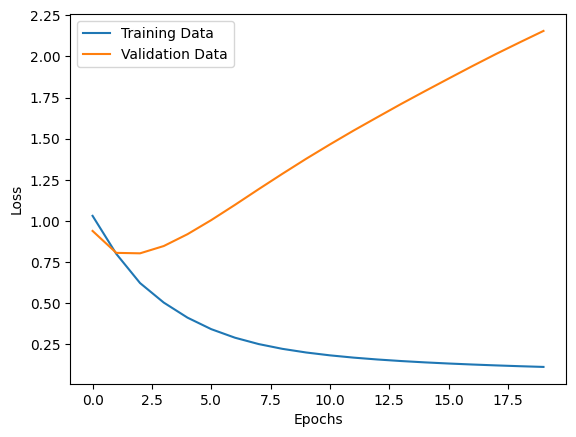

In [151]:
#ploting training and validation loss
plt.plot(history3.history['loss'],label='Training Data')
plt.plot(history3.history['val_loss'],label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

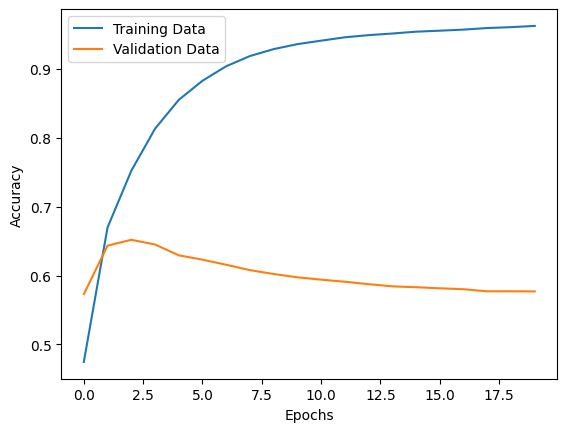

In [152]:
#ploting training and validation accuracy
plt.plot(history3.history['categorical_accuracy'],label='Training Data')
plt.plot(history3.history['val_categorical_accuracy'],label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

##Embedding 1 and 3 have almost equal accuracy so we can choose either of them

##Handling overfitting using dropout, L2 regularization


In [110]:
#Handling overfitting using dropout, L2 regularization
model1=keras.Sequential()
model1.add(hub_layer)
model1.add(keras.layers.Dropout(0.5))
model1.add(keras.layers.Dense(10,activation='relu',kernel_regularizer=keras.regularizers.l2(0.05)))
model1.add(keras.layers.Dropout(0.5))
model1.add(keras.layers.Dense(3,activation='sigmoid',kernel_regularizer=keras.regularizers.l2(0.05)))


In [111]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 50)                48190600  
                                                                 
 dropout_6 (Dropout)         (None, 50)                0         
                                                                 
 dense_12 (Dense)            (None, 10)                510       
                                                                 
 dropout_7 (Dropout)         (None, 10)                0         
                                                                 
 dense_13 (Dense)            (None, 3)                 33        
                                                                 
Total params: 48,191,143
Trainable params: 48,191,143
Non-trainable params: 0
_________________________________________________________________


In [112]:
model1.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True),
               metrics=['CategoricalAccuracy'],
               optimizer='adam')

In [113]:
history1=model1.fit(train_ds.shuffle(1000).batch(128),
          epochs=60,
          validation_data=valid_ds.batch(128))

Epoch 1/60


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


141/141 [==============================] - 16s 104ms/step - loss: 1.7592 - categorical_accuracy: 0.5567 - val_loss: 1.3984 - val_categorical_accuracy: 0.6215
Epoch 2/60
141/141 [==============================] - 7s 50ms/step - loss: 1.1522 - categorical_accuracy: 0.6976 - val_loss: 1.0928 - val_categorical_accuracy: 0.6390
Epoch 3/60
141/141 [==============================] - 4s 26ms/step - loss: 0.9213 - categorical_accuracy: 0.7275 - val_loss: 0.9828 - val_categorical_accuracy: 0.6394
Epoch 4/60
141/141 [==============================] - 3s 25ms/step - loss: 0.8225 - categorical_accuracy: 0.7494 - val_loss: 0.9463 - val_categorical_accuracy: 0.6404
Epoch 5/60
141/141 [==============================] - 5s 34ms/step - loss: 0.7845 - categorical_accuracy: 0.7720 - val_loss: 0.9337 - val_categorical_accuracy: 0.6422
Epoch 6/60
141/141 [==============================] - 4s 27ms/step - loss: 0.7608 - categorical_accuracy: 0.7767 - val_loss: 0.9310 - val_categorical_accuracy: 0.6422
Epoch 7

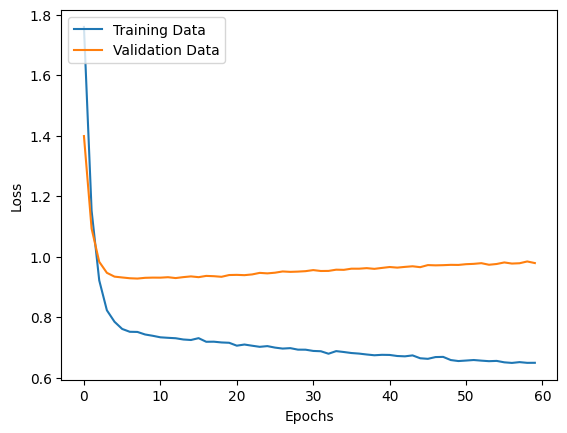

In [114]:
#for epoch =60
plt.plot(history1.history['loss'],label='Training Data')
plt.plot(history1.history['val_loss'],label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

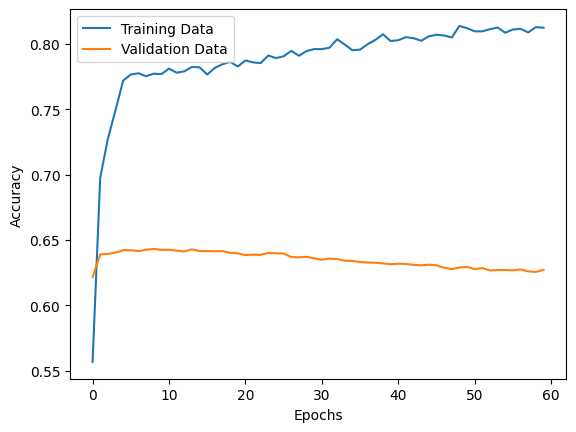

In [115]:
plt.plot(history1.history['categorical_accuracy'],label='Training Data')
plt.plot(history1.history['val_categorical_accuracy'],label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

###from above the graphs we can see that the ideal value for the epochs is 20

##Choosing an optimal dropout rate

####dropout rate = 0.1



Epoch 1/20
141/141 [==============================] - 15s 102ms/step - loss: 1.5198 - categorical_accuracy: 0.6878 - val_loss: 1.3663 - val_categorical_accuracy: 0.5929
Epoch 2/20
141/141 [==============================] - 8s 56ms/step - loss: 0.9345 - categorical_accuracy: 0.8718 - val_loss: 1.1156 - val_categorical_accuracy: 0.6212
Epoch 3/20
141/141 [==============================] - 4s 28ms/step - loss: 0.7205 - categorical_accuracy: 0.8858 - val_loss: 1.0474 - val_categorical_accuracy: 0.6280
Epoch 4/20
141/141 [==============================] - 4s 27ms/step - loss: 0.6361 - categorical_accuracy: 0.8855 - val_loss: 1.0238 - val_categorical_accuracy: 0.6316
Epoch 5/20
141/141 [==============================] - 4s 29ms/step - loss: 0.5985 - categorical_accuracy: 0.8856 - val_loss: 1.0145 - val_categorical_accuracy: 0.6301
Epoch 6/20
141/141 [==============================] - 3s 23ms/step - loss: 0.5765 - categorical_accuracy: 0.8898 - val_loss: 1.0178 - val_categorical_accuracy: 0.6

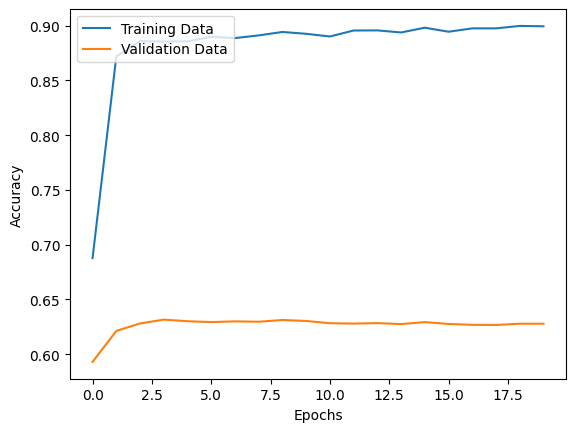

In [116]:
#Handling overfitting using dropout, L2 regularization
# taking drop out rate =0.1
model1=keras.Sequential()
model1.add(hub_layer)
model1.add(keras.layers.Dropout(0.1))
model1.add(keras.layers.Dense(10,activation='relu',kernel_regularizer=keras.regularizers.l2(0.05)))
model1.add(keras.layers.Dropout(0.1))
model1.add(keras.layers.Dense(3,activation='sigmoid',kernel_regularizer=keras.regularizers.l2(0.05)))

model1.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True),
               metrics=['CategoricalAccuracy'],
               optimizer='adam')

history1=model1.fit(train_ds.shuffle(1000).batch(128),
          epochs=20,
          validation_data=valid_ds.batch(128))

plt.plot(history1.history['categorical_accuracy'],label='Training Data')
plt.plot(history1.history['val_categorical_accuracy'],label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

####dropout rate = 0.2



Epoch 1/20
141/141 [==============================] - 15s 102ms/step - loss: 1.8417 - categorical_accuracy: 0.3650 - val_loss: 1.5220 - val_categorical_accuracy: 0.4978
Epoch 2/20
141/141 [==============================] - 4s 25ms/step - loss: 1.3769 - categorical_accuracy: 0.5200 - val_loss: 1.2444 - val_categorical_accuracy: 0.6030
Epoch 3/20
141/141 [==============================] - 5s 32ms/step - loss: 1.1598 - categorical_accuracy: 0.5915 - val_loss: 1.1009 - val_categorical_accuracy: 0.6323
Epoch 4/20
141/141 [==============================] - 3s 19ms/step - loss: 1.0419 - categorical_accuracy: 0.6253 - val_loss: 1.0291 - val_categorical_accuracy: 0.6328
Epoch 5/20
141/141 [==============================] - 1s 11ms/step - loss: 0.9777 - categorical_accuracy: 0.6484 - val_loss: 0.9923 - val_categorical_accuracy: 0.6406
Epoch 6/20
141/141 [==============================] - 2s 17ms/step - loss: 0.9450 - categorical_accuracy: 0.6590 - val_loss: 0.9729 - val_categorical_accuracy: 0.6

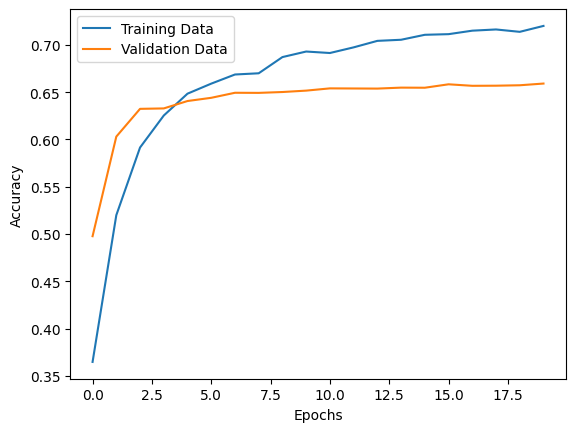

In [153]:
#Handling overfitting using dropout, L2 regularization
# taking drop out rate = 0.2
model1=keras.Sequential()
model1.add(hub_layer)
model1.add(keras.layers.Dropout(0.2))
model1.add(keras.layers.Dense(10,activation='relu',kernel_regularizer=keras.regularizers.l2(0.05)))
model1.add(keras.layers.Dropout(0.2))
model1.add(keras.layers.Dense(3,activation='sigmoid',kernel_regularizer=keras.regularizers.l2(0.05)))

model1.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True),
               metrics=['CategoricalAccuracy'],
               optimizer='adam')

history1=model1.fit(train_ds.shuffle(1000).batch(128),
          epochs=20,
          validation_data=valid_ds.batch(128))

plt.plot(history1.history['categorical_accuracy'],label='Training Data')
plt.plot(history1.history['val_categorical_accuracy'],label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

####dropout rate = 0.3



Epoch 1/20
141/141 [==============================] - 14s 91ms/step - loss: 1.6080 - categorical_accuracy: 0.4552 - val_loss: 1.3223 - val_categorical_accuracy: 0.5779
Epoch 2/20
141/141 [==============================] - 3s 23ms/step - loss: 1.1790 - categorical_accuracy: 0.5938 - val_loss: 1.0752 - val_categorical_accuracy: 0.6437
Epoch 3/20
141/141 [==============================] - 3s 23ms/step - loss: 0.9930 - categorical_accuracy: 0.6552 - val_loss: 0.9750 - val_categorical_accuracy: 0.6558
Epoch 4/20
141/141 [==============================] - 3s 22ms/step - loss: 0.9076 - categorical_accuracy: 0.6901 - val_loss: 0.9390 - val_categorical_accuracy: 0.6562
Epoch 5/20
141/141 [==============================] - 2s 14ms/step - loss: 0.8742 - categorical_accuracy: 0.6956 - val_loss: 0.9244 - val_categorical_accuracy: 0.6587
Epoch 6/20
141/141 [==============================] - 1s 10ms/step - loss: 0.8609 - categorical_accuracy: 0.6968 - val_loss: 0.9178 - val_categorical_accuracy: 0.65

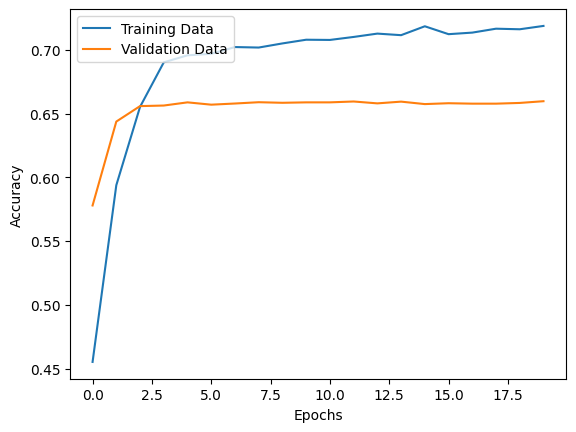

In [154]:
#Handling overfitting using dropout, L2 regularization
# taking drop out rate = 0.3
model1=keras.Sequential()
model1.add(hub_layer)
model1.add(keras.layers.Dropout(0.3))
model1.add(keras.layers.Dense(10,activation='relu',kernel_regularizer=keras.regularizers.l2(0.05)))
model1.add(keras.layers.Dropout(0.3))
model1.add(keras.layers.Dense(3,activation='sigmoid',kernel_regularizer=keras.regularizers.l2(0.05)))

model1.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True),
               metrics=['CategoricalAccuracy'],
               optimizer='adam')

history1=model1.fit(train_ds.shuffle(1000).batch(128),
          epochs=20,
          validation_data=valid_ds.batch(128))

plt.plot(history1.history['categorical_accuracy'],label='Training Data')
plt.plot(history1.history['val_categorical_accuracy'],label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

####dropout rate = 0.4

Epoch 1/20
141/141 [==============================] - 14s 89ms/step - loss: 1.7758 - categorical_accuracy: 0.3938 - val_loss: 1.4570 - val_categorical_accuracy: 0.5323
Epoch 2/20
141/141 [==============================] - 4s 28ms/step - loss: 1.2840 - categorical_accuracy: 0.5673 - val_loss: 1.1558 - val_categorical_accuracy: 0.6335
Epoch 3/20
141/141 [==============================] - 3s 18ms/step - loss: 1.0432 - categorical_accuracy: 0.6619 - val_loss: 1.0178 - val_categorical_accuracy: 0.6496
Epoch 4/20
141/141 [==============================] - 3s 19ms/step - loss: 0.9361 - categorical_accuracy: 0.6919 - val_loss: 0.9580 - val_categorical_accuracy: 0.6559
Epoch 5/20
141/141 [==============================] - 1s 8ms/step - loss: 0.8853 - categorical_accuracy: 0.6942 - val_loss: 0.9285 - val_categorical_accuracy: 0.6559
Epoch 6/20
141/141 [==============================] - 1s 9ms/step - loss: 0.8571 - categorical_accuracy: 0.6998 - val_loss: 0.9136 - val_categorical_accuracy: 0.6569

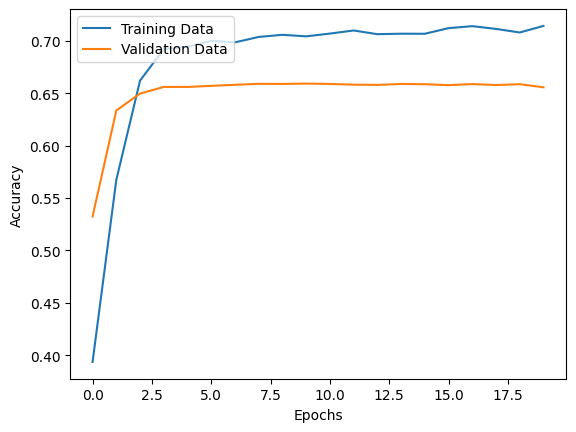

In [155]:
#Handling overfitting using dropout, L2 regularization
# taking drop out rate = 0.4
model1=keras.Sequential()
model1.add(hub_layer)
model1.add(keras.layers.Dropout(0.4))
model1.add(keras.layers.Dense(10,activation='relu',kernel_regularizer=keras.regularizers.l2(0.05)))
model1.add(keras.layers.Dropout(0.4))
model1.add(keras.layers.Dense(3,activation='sigmoid',kernel_regularizer=keras.regularizers.l2(0.05)))

model1.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True),
               metrics=['CategoricalAccuracy'],
               optimizer='adam')

history1=model1.fit(train_ds.shuffle(1000).batch(128),
          epochs=20,
          validation_data=valid_ds.batch(128))

plt.plot(history1.history['categorical_accuracy'],label='Training Data')
plt.plot(history1.history['val_categorical_accuracy'],label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

####dropout rate = 0.6

Epoch 1/20
141/141 [==============================] - 13s 84ms/step - loss: 2.1821 - categorical_accuracy: 0.4021 - val_loss: 1.4248 - val_categorical_accuracy: 0.5801
Epoch 2/20
141/141 [==============================] - 5s 36ms/step - loss: 1.4401 - categorical_accuracy: 0.4979 - val_loss: 1.1805 - val_categorical_accuracy: 0.6467
Epoch 3/20
141/141 [==============================] - 2s 17ms/step - loss: 1.1537 - categorical_accuracy: 0.5902 - val_loss: 1.0531 - val_categorical_accuracy: 0.6541
Epoch 4/20
141/141 [==============================] - 1s 10ms/step - loss: 1.0227 - categorical_accuracy: 0.6295 - val_loss: 0.9847 - val_categorical_accuracy: 0.6544
Epoch 5/20
141/141 [==============================] - 2s 15ms/step - loss: 0.9568 - categorical_accuracy: 0.6490 - val_loss: 0.9475 - val_categorical_accuracy: 0.6539
Epoch 6/20
141/141 [==============================] - 1s 10ms/step - loss: 0.9135 - categorical_accuracy: 0.6631 - val_loss: 0.9245 - val_categorical_accuracy: 0.65

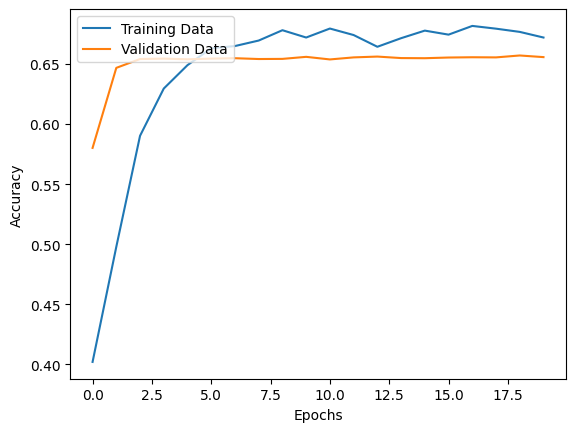

In [158]:
#Handling overfitting using dropout, L2 regularization
# taking drop out rate = 0.6
model1=keras.Sequential()
model1.add(hub_layer)
model1.add(keras.layers.Dropout(0.6))
model1.add(keras.layers.Dense(10,activation='relu',kernel_regularizer=keras.regularizers.l2(0.05)))
model1.add(keras.layers.Dropout(0.6))
model1.add(keras.layers.Dense(3,activation='sigmoid',kernel_regularizer=keras.regularizers.l2(0.05)))

model1.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True),
               metrics=['CategoricalAccuracy'],
               optimizer='adam')

history1=model1.fit(train_ds.shuffle(1000).batch(128),
          epochs=20,
          validation_data=valid_ds.batch(128))

plt.plot(history1.history['categorical_accuracy'],label='Training Data')
plt.plot(history1.history['val_categorical_accuracy'],label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

####dropout rate = 0.7

Epoch 1/20
141/141 [==============================] - 14s 94ms/step - loss: 2.6557 - categorical_accuracy: 0.3778 - val_loss: 1.5173 - val_categorical_accuracy: 0.5394
Epoch 2/20
141/141 [==============================] - 3s 25ms/step - loss: 1.6976 - categorical_accuracy: 0.4130 - val_loss: 1.3063 - val_categorical_accuracy: 0.5610
Epoch 3/20
141/141 [==============================] - 2s 14ms/step - loss: 1.3440 - categorical_accuracy: 0.4562 - val_loss: 1.1687 - val_categorical_accuracy: 0.5962
Epoch 4/20
141/141 [==============================] - 3s 20ms/step - loss: 1.1646 - categorical_accuracy: 0.5353 - val_loss: 1.0712 - val_categorical_accuracy: 0.6455
Epoch 5/20
141/141 [==============================] - 2s 11ms/step - loss: 1.0618 - categorical_accuracy: 0.5847 - val_loss: 1.0086 - val_categorical_accuracy: 0.6542
Epoch 6/20
141/141 [==============================] - 1s 7ms/step - loss: 0.9974 - categorical_accuracy: 0.6005 - val_loss: 0.9686 - val_categorical_accuracy: 0.653

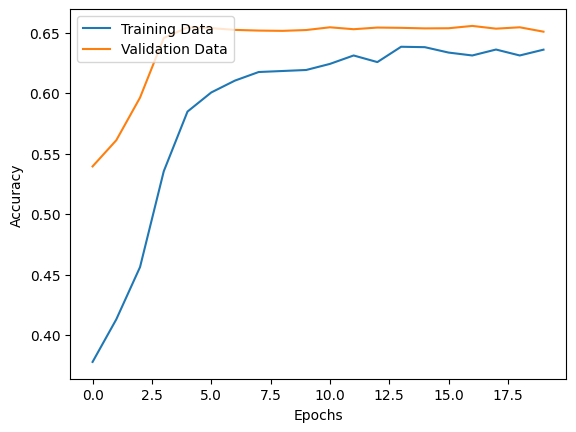

In [159]:
#Handling overfitting using dropout, L2 regularization
# taking drop out rate = 0.7
model1=keras.Sequential()
model1.add(hub_layer)
model1.add(keras.layers.Dropout(0.7))
model1.add(keras.layers.Dense(10,activation='relu',kernel_regularizer=keras.regularizers.l2(0.05)))
model1.add(keras.layers.Dropout(0.7))
model1.add(keras.layers.Dense(3,activation='sigmoid',kernel_regularizer=keras.regularizers.l2(0.05)))

model1.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True),
               metrics=['CategoricalAccuracy'],
               optimizer='adam')

history1=model1.fit(train_ds.shuffle(1000).batch(128),
          epochs=20,
          validation_data=valid_ds.batch(128))

plt.plot(history1.history['categorical_accuracy'],label='Training Data')
plt.plot(history1.history['val_categorical_accuracy'],label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

#### dropout rate = 0.8

Epoch 1/20
141/141 [==============================] - 13s 88ms/step - loss: 3.0777 - categorical_accuracy: 0.3639 - val_loss: 1.6010 - val_categorical_accuracy: 0.4532
Epoch 2/20
141/141 [==============================] - 4s 29ms/step - loss: 1.9806 - categorical_accuracy: 0.4147 - val_loss: 1.3662 - val_categorical_accuracy: 0.5466
Epoch 3/20
141/141 [==============================] - 3s 23ms/step - loss: 1.5187 - categorical_accuracy: 0.4483 - val_loss: 1.2343 - val_categorical_accuracy: 0.5843
Epoch 4/20
141/141 [==============================] - 2s 17ms/step - loss: 1.3109 - categorical_accuracy: 0.4746 - val_loss: 1.1476 - val_categorical_accuracy: 0.5950
Epoch 5/20
141/141 [==============================] - 1s 8ms/step - loss: 1.1813 - categorical_accuracy: 0.5013 - val_loss: 1.0795 - val_categorical_accuracy: 0.6128
Epoch 6/20
141/141 [==============================] - 2s 11ms/step - loss: 1.1048 - categorical_accuracy: 0.5293 - val_loss: 1.0293 - val_categorical_accuracy: 0.622

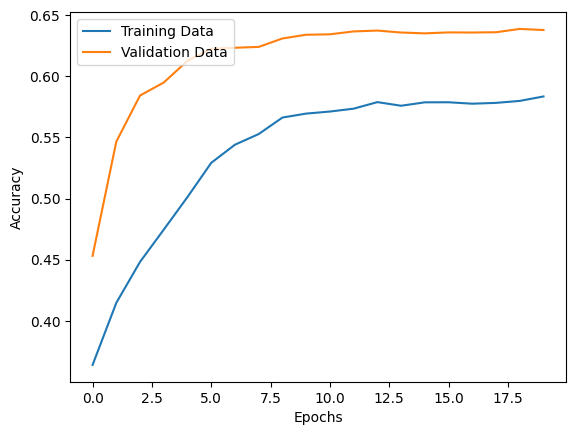

In [160]:
#Handling overfitting using dropout, L2 regularization
# taking drop out rate = 0.8
model1=keras.Sequential()
model1.add(hub_layer)
model1.add(keras.layers.Dropout(0.8))
model1.add(keras.layers.Dense(10,activation='relu',kernel_regularizer=keras.regularizers.l2(0.05)))
model1.add(keras.layers.Dropout(0.8))
model1.add(keras.layers.Dense(3,activation='sigmoid',kernel_regularizer=keras.regularizers.l2(0.05)))

model1.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True),
               metrics=['CategoricalAccuracy'],
               optimizer='adam')

history1=model1.fit(train_ds.shuffle(1000).batch(128),
          epochs=20,
          validation_data=valid_ds.batch(128))

plt.plot(history1.history['categorical_accuracy'],label='Training Data')
plt.plot(history1.history['val_categorical_accuracy'],label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

####dropout rate = 0.9

Epoch 1/20
141/141 [==============================] - 13s 83ms/step - loss: 4.3256 - categorical_accuracy: 0.3877 - val_loss: 1.6048 - val_categorical_accuracy: 0.4706
Epoch 2/20
141/141 [==============================] - 4s 28ms/step - loss: 2.7723 - categorical_accuracy: 0.4082 - val_loss: 1.4011 - val_categorical_accuracy: 0.5576
Epoch 3/20
141/141 [==============================] - 3s 19ms/step - loss: 2.0442 - categorical_accuracy: 0.4135 - val_loss: 1.3013 - val_categorical_accuracy: 0.5301
Epoch 4/20
141/141 [==============================] - 2s 16ms/step - loss: 1.5852 - categorical_accuracy: 0.4204 - val_loss: 1.2487 - val_categorical_accuracy: 0.4851
Epoch 5/20
141/141 [==============================] - 2s 17ms/step - loss: 1.4099 - categorical_accuracy: 0.4319 - val_loss: 1.2088 - val_categorical_accuracy: 0.4466
Epoch 6/20
141/141 [==============================] - 2s 12ms/step - loss: 1.2899 - categorical_accuracy: 0.4351 - val_loss: 1.1730 - val_categorical_accuracy: 0.44

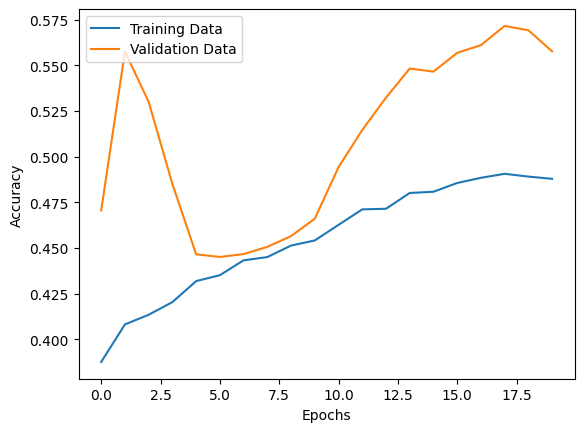

In [161]:
#Handling overfitting using dropout, L2 regularization
# taking drop out rate = 0.9
model1=keras.Sequential()
model1.add(hub_layer)
model1.add(keras.layers.Dropout(0.9))
model1.add(keras.layers.Dense(10,activation='relu',kernel_regularizer=keras.regularizers.l2(0.05)))
model1.add(keras.layers.Dropout(0.9))
model1.add(keras.layers.Dense(3,activation='sigmoid',kernel_regularizer=keras.regularizers.l2(0.05)))

model1.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True),
               metrics=['CategoricalAccuracy'],
               optimizer='adam')

history1=model1.fit(train_ds.shuffle(1000).batch(128),
          epochs=20,
          validation_data=valid_ds.batch(128))

plt.plot(history1.history['categorical_accuracy'],label='Training Data')
plt.plot(history1.history['val_categorical_accuracy'],label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [27]:
#Testing the model on test data
model1.evaluate(test_x,test_y)

108/108 [==============================] - 1s 6ms/step - loss: 0.9712 - categorical_accuracy: 0.6392


[0.9711559414863586, 0.6391962766647339]

### optimal dropout rate is 0.5

#QUES 2

In [162]:
from torchvision import datasets,transforms
import torch
import numpy as np

In [163]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
train_dataset=datasets.FashionMNIST("FashionMNIST/raw/train-images-idx3-ubyte", train=True, download= True,  transform = transform)
test_dataset=datasets.FashionMNIST("FashionMNIST/raw/train-images-idx3-ubyte", train=False, download= True,  transform = transform)

In [164]:
#Data Loader
train_loader=torch.utils.data.DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader=torch.utils.data.DataLoader(test_dataset,batch_size=64,shuffle=True)

In [165]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
dataiter=iter(train_loader)
print(dataiter)
images,labels=next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


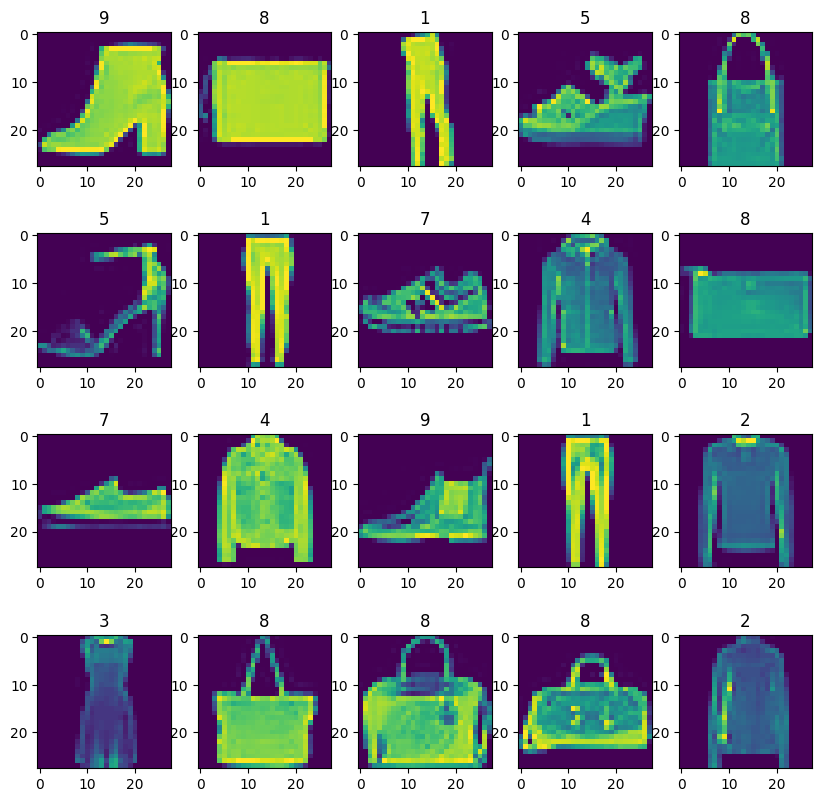

In [166]:
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(figsize=(10,10))
for idx in np.arange(20):
  ax=fig.add_subplot(4,int(20/4),idx+1)
  ax.imshow(np.squeeze(images[idx]))
  ax.set_title(labels[idx].item())

In [167]:
#defining model and loss function
from torch import nn, optim
import torch.nn.functional as F

model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim = 1)
                     )

# Define the loss
criterion = nn.NLLLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr = 0.002)

In [168]:
# Define the epochs
epochs = 30

train_losses, test_losses = [], []

for e in range(epochs):
  running_loss = 0
  for images, labels in train_loader:
    # Flatten Fashion-MNIST images into a 784 long vector
    images = images.view(images.shape[0], -1)
    
    # Training pass
    optimizer.zero_grad()
    
    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
  else:
    test_loss = 0
    accuracy = 0
    
    # Turn off gradients for validation, saves memory and computation
    with torch.no_grad():
      # Set the model to evaluation mode
      model.eval()
      
      # Validation pass
      for images, labels in test_loader:
        images = images.view(images.shape[0], -1)
        log_ps = model(images)
        test_loss += criterion(log_ps, labels)
        
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim = 1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
    
    model.train()
    train_losses.append(running_loss/len(train_loader))
    test_losses.append(test_loss/len(test_loader))
    
    print("Epoch: {}/{}..".format(e+1, epochs),
          "Training loss: {:.3f}..".format(running_loss/len(train_loader)),
          "Test loss: {:.3f}..".format(test_loss/len(test_loader)),
          "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))

Epoch: 1/30.. Training loss: 0.593.. Test loss: 0.469.. Test Accuracy: 0.833
Epoch: 2/30.. Training loss: 0.458.. Test loss: 0.458.. Test Accuracy: 0.833
Epoch: 3/30.. Training loss: 0.422.. Test loss: 0.393.. Test Accuracy: 0.860
Epoch: 4/30.. Training loss: 0.403.. Test loss: 0.413.. Test Accuracy: 0.853
Epoch: 5/30.. Training loss: 0.387.. Test loss: 0.376.. Test Accuracy: 0.866
Epoch: 6/30.. Training loss: 0.376.. Test loss: 0.367.. Test Accuracy: 0.868
Epoch: 7/30.. Training loss: 0.364.. Test loss: 0.380.. Test Accuracy: 0.868
Epoch: 8/30.. Training loss: 0.356.. Test loss: 0.375.. Test Accuracy: 0.871
Epoch: 9/30.. Training loss: 0.353.. Test loss: 0.380.. Test Accuracy: 0.865
Epoch: 10/30.. Training loss: 0.346.. Test loss: 0.352.. Test Accuracy: 0.875
Epoch: 11/30.. Training loss: 0.337.. Test loss: 0.364.. Test Accuracy: 0.872
Epoch: 12/30.. Training loss: 0.337.. Test loss: 0.370.. Test Accuracy: 0.873
Epoch: 13/30.. Training loss: 0.331.. Test loss: 0.364.. Test Accuracy: 0

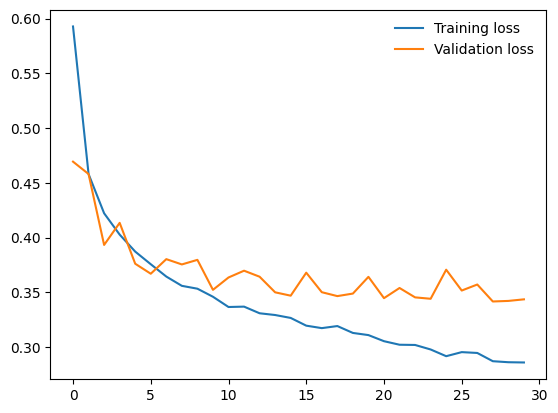

In [169]:
plt.plot(train_losses, label = "Training loss")
plt.plot(test_losses, label = "Validation loss")
plt.legend(frameon = False)



> It can be seen from graph that the training loss decreases with each epoch but the validation loss increases after some epoch so it is causing overfitting. We can take the epoch value as 10 as seen in the plot.




In [170]:
# Define the epochs
epochs = 10

train_losses, test_losses = [], []

for e in range(epochs):
  running_loss = 0
  for images, labels in train_loader:
    # Flatten Fashion-MNIST images into a 784 long vector
    images = images.view(images.shape[0], -1)
    
    # Training pass
    optimizer.zero_grad()
    
    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
  else:
    test_loss = 0
    accuracy = 0
    
    # Turn off gradients for validation, saves memory and computation
    with torch.no_grad():
      # Set the model to evaluation mode
      model.eval()
      
      # Validation pass
      for images, labels in test_loader:
        images = images.view(images.shape[0], -1)
        log_ps = model(images)
        test_loss += criterion(log_ps, labels)
        
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim = 1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
    
    model.train()
    train_losses.append(running_loss/len(train_loader))
    test_losses.append(test_loss/len(test_loader))
    
    print("Epoch: {}/{}..".format(e+1, epochs),
          "Training loss: {:.3f}..".format(running_loss/len(train_loader)),
          "Test loss: {:.3f}..".format(test_loss/len(test_loader)),
          "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))

Epoch: 1/10.. Training loss: 0.288.. Test loss: 0.344.. Test Accuracy: 0.883
Epoch: 2/10.. Training loss: 0.284.. Test loss: 0.347.. Test Accuracy: 0.885
Epoch: 3/10.. Training loss: 0.279.. Test loss: 0.359.. Test Accuracy: 0.878
Epoch: 4/10.. Training loss: 0.278.. Test loss: 0.360.. Test Accuracy: 0.878
Epoch: 5/10.. Training loss: 0.275.. Test loss: 0.353.. Test Accuracy: 0.884
Epoch: 6/10.. Training loss: 0.274.. Test loss: 0.355.. Test Accuracy: 0.883
Epoch: 7/10.. Training loss: 0.273.. Test loss: 0.359.. Test Accuracy: 0.879
Epoch: 8/10.. Training loss: 0.274.. Test loss: 0.342.. Test Accuracy: 0.889
Epoch: 9/10.. Training loss: 0.268.. Test loss: 0.355.. Test Accuracy: 0.883
Epoch: 10/10.. Training loss: 0.266.. Test loss: 0.352.. Test Accuracy: 0.884
